/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide


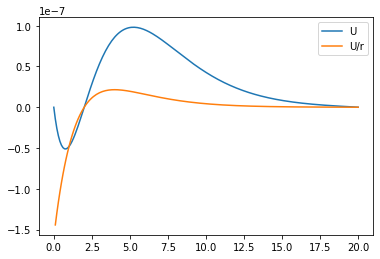

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def v(x):   #hydrogenic potential
    return -1/x

def vpuls(x):   #puls potential
    a0=1
    return -1/x*(1-2*np.exp(-2*x/a0)*(1+x/a0))

Nmax=201
Rmax=20  # radius in Bohr radii
Rinc=Rmax/(Nmax-1)
#print(Rinc)
R=np.linspace(0,Rmax,Nmax)
#print(R)
U=np.empty([Nmax])    # wave function product r*R(r)
U[Nmax-1]=0           #initial values at large r
U[Nmax-2]=1e-10
#print('U',type(U),len(U))
#print('R',type(R),len(R))
#print(R[Nmax-1])

l=0
#solve wavefunctions r*R using Verlet method
for E in [-1/4]: 
    for i in range(Nmax-1,1,-1):
        #print(R[i],v(R[i]))
        U[i-2]=2*U[i-1]-U[i]+Rinc**2*(-E+2*v(R[i-1]+l*(l+1)/R[i-1]))*U[i-1]
        #Franchini code: u(i-1)=2*u(i)-u(i+1)+h**2*(-2*e+2*v(i)+l*(l+1)/x(i)**2)*u(i)
    #plt.yscale('log')
    plt.plot(R,U,label='U')
    plt.plot(R,U/R,label='U/r')
    plt.legend()